# <center>CONSTITUTION DU DATASET</center> #

## <font color='#5BA69E'>INTRODUCTION</font> ##

Le jeu de données du projet French Industry est composé de données publiées par l'INSEE, réparties sur 4 tables :

- géographie
- démographie des entreprises
- salaires
- populations.

Le lien entre ces 4 tables est le code géographique communale de l'INSEE. Code à partir duquel on peut déterminer la localisation gps ainsi que toutes les appartenances à des zones administratives (régions, départements, etc.)

Datant de 2014, le jeu a été réactualisé par nos soins avec des données publiées en 2020, dernière année pour laquelle nous pouvions regrouper l'ensemble des variables à l'indentique. Nous l'avons également considérablement élargi avec de nombreuses variables et les tables ont été rassemblées sur fichier unique.

Le jeu de données 2020 porte sur près de 35.000 communes. 

## <font color='#5BA69E'>IMPORT DES LIBRAIRIES</font> ##

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#élargissement de la visualisation des tableaux pandas
pd.set_option('display.max_columns', None)

#suppression des warnings
import warnings
warnings.filterwarnings('ignore')

## <font color='#5BA69E'>CHARTE GRAPHIQUE</font> ##

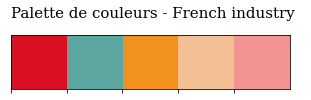

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.palplot(["#D91122", "#5BA69E", "#F2911B", "#F2C094", "#F29494"])
plt.title("Palette de couleurs - French industry  ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

## <font color='#5BA69E'>IMPORT DU DATASET 2020</font> ##

In [3]:
df = pd.read_csv('../files/all_content_2020_v4.csv', dtype={'CODGEO': 'string', 'REG':'string', 'DEP':'string'})

In [4]:
#suppression colonne unamed 0
df = df.iloc[:,1:]
df.head()

,CODGEO,EU_circo,num_region,num_dep,nom_commune,nom_dep,nom_region,num_chef_lieu,nom_chef_lieu,code_postal,latitude,longitude,pop_tot,SUPERF,P19_POP,P19_POP1529,P19_POP3044,P19_POP4559,P19_POP6074,P19_POP7589,P19_POP90P,P19_POPH,P19_H1529,P19_H3044,P19_H4559,P19_H6074,P19_H7589,P19_H90P,P19_H0019,P19_H2064,P19_H65P,P19_POPF,P19_F1529,P19_F3044,P19_F4559,P19_F6074,P19_F7589,P19_F90P,P19_F0019,P19_F2064,P19_F65P,P19_POP01P,P19_POP01P_IRAN1,P19_POP01P_IRAN2,P19_POP01P_IRAN3,P19_POP01P_IRAN4,P19_POP01P_IRAN5,P19_POP01P_IRAN6,P19_POP01P_IRAN7,P19_POP0114_IRAN2P,P19_POP0114_IRAN2,P19_POP0114_IRAN3P,P19_POP1524_IRAN2P,P19_POP1524_IRAN2,P19_POP1524_IRAN3P,P19_POP2554_IRAN2P,P19_POP2554_IRAN2,P19_POP2554_IRAN3P,P19_POP55P_IRAN2P,P19_POP55P_IRAN2,P19_POP55P_IRAN3P,C19_POP15P,C19_POP15P_CS1,C19_POP15P_CS2,C19_POP15P_CS3,C19_POP15P_CS4,C19_POP15P_CS5,C19_POP15P_CS6,C19_POP15P_CS7,C19_POP15P_CS8,C19_H15P,C19_H15P_CS1,C19_H15P_CS2,C19_H15P_CS3,C19_H15P_CS4,C19_H15P_CS5,C19_H15P_CS6,C19_H15P_CS7,C19_H15P_CS8,C19_F15P,C19_F15P_CS1,C19_F15P_CS2,C19_F15P_CS3,C19_F15P_CS4,C19_F15P_CS5,C19_F15P_CS6,C19_F15P_CS7,C19_F15P_CS8,C19_POP1524,C19_POP1524_CS1,C19_POP1524_CS2,C19_POP1524_CS3,C19_POP1524_CS4,C19_POP1524_CS5,C19_POP1524_CS6,C19_POP1524_CS7,C19_POP1524_CS8,C19_POP2554,C19_POP2554_CS1,C19_POP2554_CS2,C19_POP2554_CS3,C19_POP2554_CS4,C19_POP2554_CS5,C19_POP2554_CS6,C19_POP2554_CS7,C19_POP2554_CS8,C19_POP55P,C19_POP55P_CS1,C19_POP55P_CS2,C19_POP55P_CS3,C19_POP55P_CS4,C19_POP55P_CS5,C19_POP55P_CS6,C19_POP55P_CS7,C19_POP55P_CS8,C19_MEN,C19_MENPSEUL,C19_MENHSEUL,C19_MENFSEUL,C19_MENSFAM,C19_MENFAM,C19_MENCOUPSENF,C19_MENCOUPAENF,C19_MENFAMMONO,C19_PMEN,C19_PMEN_MENPSEUL,C19_PMEN_MENHSEUL,C19_PMEN_MENFSEUL,C19_PMEN_MENSFAM,C19_PMEN_MENFAM,C19_PMEN_MENCOUPSENF,C19_PMEN_MENCOUPAENF,C19_PMEN_MENFAMMONO,P19_POP15P,P19_POP1519,P19_POP2024,P19_POP2539,P19_POP4054,P19_POP5564,P19_POP6579,P19_POP80P,P19_POPMEN1519,P19_POPMEN2024,P19_POPMEN2539,P19_POPMEN4054,P19_POPMEN5564,P19_POPMEN6579,P19_POPMEN80P,P19_POP1519_PSEUL,P19_POP2024_PSEUL,P19_POP2539_PSEUL,P19_POP4054_PSEUL,P19_POP5564_PSEUL,P19_POP6579_PSEUL,P19_POP80P_PSEUL,P19_POP1519_COUPLE,P19_POP2024_COUPLE,P19_POP2539_COUPLE,P19_POP4054_COUPLE,P19_POP5564_COUPLE,P19_POP6579_COUPLE,P19_POP80P_COUPLE,P19_POP15P_MARIEE,P19_POP15P_PACSEE,P19_POP15P_CONCUB_UNION_LIBRE,P19_POP15P_VEUFS,P19_POP15P_DIVORCEE,P19_POP15P_CELIBATAIRE,C19_MEN_CS1,C19_MEN_CS2,C19_MEN_CS3,C19_MEN_CS4,C19_MEN_CS5,C19_MEN_CS6,C19_MEN_CS7,C19_MEN_CS8,C19_PMEN_CS1,C19_PMEN_CS2,C19_PMEN_CS3,C19_PMEN_CS4,C19_PMEN_CS5,C19_PMEN_CS6,C19_PMEN_CS7,C19_PMEN_CS8,C19_FAM,C19_COUPAENF,C19_FAMMONO,C19_HMONO,C19_FMONO,C19_COUPSENF,C19_NE24F0,C19_NE24F1,C19_NE24F2,C19_NE24F3,C19_NE24F4P,P19_LOG,P19_RP,P19_RSECOCC,P19_LOGVAC,P19_MAISON,P19_APPART,P19_RP_1P,P19_RP_2P,P19_RP_3P,P19_RP_4P,P19_RP_5PP,P19_NBPI_RP,P19_RPMAISON,P19_NBPI_RPMAISON,P19_RPAPPART,P19_NBPI_RPAPPART,C19_RP_HSTU1P,C19_RP_HSTU1P_SUROCC,P19_RP_ACHTOT,P19_RP_ACH19,P19_RP_ACH45,P19_RP_ACH70,P19_RP_ACH90,P19_RP_ACH05,P19_RPMAISON_ACH19,P19_RPMAISON_ACH45,P19_RPMAISON_ACH70,P19_RPMAISON_ACH90,P19_RPMAISON_ACH05,P19_RPAPPART_ACH19,P19_RPAPPART_ACH45,P19_RPAPPART_ACH70,P19_RPAPPART_ACH90,P19_RPAPPART_ACH05,P19_MEN,P19_MEN_ANEM0002,P19_MEN_ANEM0204,P19_MEN_ANEM0509,P19_MEN_ANEM10P,P19_MEN_ANEM1019,P19_MEN_ANEM2029,P19_MEN_ANEM30P,P19_PMEN,P19_PMEN_ANEM0002,P19_PMEN_ANEM0204,P19_PMEN_ANEM0509,P19_PMEN_ANEM10P,P19_NBPI_RP_ANEM0002,P19_NBPI_RP_ANEM0204,P19_NBPI_RP_ANEM0509,P19_NBPI_RP_ANEM10P,P19_RP_PROP,P19_RP_LOC,P19_RP_LOCHLMV,P19_RP_GRAT,P19_NPER_RP,P19_NPER_RP_PROP,P19_NPER_RP_LOC,P19_NPER_RP_LOCHLMV,P19_NPER_RP_GRAT,P19_ANEM_RP,P19_ANEM_RP_PROP,P19_ANEM_RP_LOC,P19_ANEM_RP_LOCHLMV,P19_ANEM_RP_GRAT,P19_RP_SDB,P19_RP_CCCOLL,P19_RP_CCIND,P19_RP_CINDELEC,P19_RP_ELEC,P19_RP_EAUCH,P19_RP_BDWC,P19_RP_CHOS,P19_RP_CLIM,P19_RP_TTEGOU,P19_RP_GARL,P19_RP_VOIT1P,P19_RP_VOIT1,P19_RP_VOIT2P,P19_RP_HABFOR,P19_RP_CASE,P19_RP_MIBOIS,P19_RP_MIDUR,P19_POP0205,P19_POP0610,P19_POP1824,P19_POP2529,P19_POP30P,P19_

De nombreuses désignations de variables sont codifiées par l'INSEE.  

Afin de pouvoir se répérer au sein de ces variables, il est nécessaire de se référer à un fichier descriptif.

[Lien vers le fichier descriptif](https://docs.google.com/spreadsheets/d/1m9MQoDUwLlo7mqlWtpj2xH0xIk5q_Y4pvI-ZFEC5eHo/edit?usp=sharing)

On importe également ce même fichier au format csv pour une utilisation ultérieure.

In [5]:
df_descr = pd.read_csv('../files/description_variables.csv', sep=';', dtype={'CODVAR': 'string'})

In [6]:
df_descr = df_descr.iloc[:,:-2] #suprresion des deux dernières colonnes (vides)
df_descr.head()

,CODVAR,Nombre données,Nombre NaN,Type,Description,thème
0,CODGEO,34955,0,object,Code commune INSEE,Géographique
1,EU_circo,34955,0,object,Zone France,Géographique
2,num_region,34955,0,object,Numéro de la région,Géographique
3,num_dep,34955,0,object,Numéro du département,Géographique
4,nom_commune,34955,0,object,Nom de la commune,Géographique


A ce dataset, il manque cependant un aspect géographique intéressant qui est l'[aire d'attraction des villes](https://www.insee.fr/fr/information/4803954). Nous allons donc importer un dataset qui va nous permettre d'effectuer ultérieurement une jointure avec la variable CODGEO de manière à récupérer les informations sur les aires d'attractions, ainsi que les fonds de cartes associés.

In [7]:
print('Nombre de communes du dataset 2020 :', len(df))

Nombre de communes du dataset 2020 : 34955


## <font color='#5BA69E'>DATASET AIRE D'ATTRACTION DES VILLES 2020</font> ##

In [8]:
aav = pd.read_csv('../files/AAV20.csv', sep=';', dtype='string')
aav.head()

,CODGEO,LIBGEO,AAV2020,LIBAAV2020,CATEAAV2020,DEP,REG
0,01001,L'Abergement-Clémenciat,524,Châtillon-sur-Chalaronne,20,01,84
1,01002,L'Abergement-de-Varey,000,Commune hors attraction des villes,30,01,84
2,01004,Ambérieu-en-Bugey,243,Ambérieu-en-Bugey,11,01,84
3,01005,Ambérieux-en-Dombes,002,Lyon,20,01,84
4,01006,Ambléon,286,Belley,20,01,84


In [9]:
print('Nombre de communes du dataset aire d\'attraction des villes :', len(aav))
print('Nombre d\'aires d\'attraction des villes :', aav.AAV2020.nunique())

Nombre de communes du dataset aire d'attraction des villes : 34968
Nombre d'aires d'attraction des villes : 700


## <font color='#5BA69E'>DATASET ETABLISSEMENTS 2020</font> ##

Un des axes du projet French Industry est l'étude des inégalités du tissu économique en France.

A partir des variables proposées par le dataset 2020, nous allons créér un dataset spécifique sur ce thème.

###  <font color='#F29494'>SELECTION DES VARIABLES </color> ###

Dans notre dataset, nous disposons de 738 variables dont 168 concernant les entreprises réparties entre deux thématiques principales déclinées par plusieurs sous-thèmes:

- Démographie des entreprises
- Caractèristiques des établissements

Par entreprise, on distingue une [unité légale](https://www.insee.fr/fr/metadonnees/definition/c1044) d'un [établissement](https://www.insee.fr/fr/metadonnees/definition/c1377).

Les établissements étant beaucoup plus représentatifs du tissu économique que les unités légales, qui peuvent finalement n'être que des simples boites aux lettres ou des auto-entrepreneurs, nous choisissons volontairement d'orienter le choix des variables vers des données concernant les établissements.

Les 168 variables d'entreprises sont des déclinaisons du nombre d'entreprises sur une année par :
   - activité
   - taille
   - effectif
   - création
   - [sphère](https://www.insee.fr/fr/metadonnees/definition/c1886#:~:text=Il%20s'agit%20des%20activit%C3%A9s,les%20entreprises%20de%20cette%20sph%C3%A8re.)
   
Pour le projet, et après une phase exploratoire réalisée dans d'autres notebooks sur le potentiel des données , notre sélection se portera sur les variables suivantes :

In [10]:
#Selection des variables après consultation du fichier descriptif
variables = ['CODGEO', 'ETTOT20', 'ETPRES20', 'ETNPRES20', 'ETCTOT20', 'ENCTOT20', 'ETBE20', 'ETTEF5020', 'MED20']

#Chargement des descriptions des variables sélectionnées
df_descr[df_descr['CODVAR'].isin(variables)].reset_index(drop=True)

,CODVAR,Nombre données,Nombre NaN,Type,Description,thème
0,CODGEO,34955,0,object,Code commune INSEE,Géographique
1,MED20,34884,71,object,Médiane du niveau vie (€),Revenus et pauvreté des ménages
2,ETTOT20,34938,17,float64,Total Ets actifs fin 2020,Caractéristiques des établissements
3,ETBE20,34937,18,float64,Ets actifs industrie fin 2020,Caractéristiques des établissements
4,ETTEF5020,34937,18,float64,Ets actifs de 50 salariés ou plus fin 2020,Caractéristiques des établissements
5,ETPRES20,34938,17,float64,Ets actifs sphère présentielle fin 2020,Caractéristiques des établissements
6,ETNPRES20,34938,17,float64,Ets actifs sphère productive fin 2020,Caractéristiques des établissements
7,ENCTOT20,34955,0,int64,Créations d'entr. En 2020,Démographie des entreprises
8,ETCTOT20,34955,0,int64,Créations d'ets en 2020,Démographie des entreprises


Même si le niveau de vie médian n'est pas catégorisé comme une variable liée aux entreprises, nous l'apportons à ce dataset comme variable cible pour des travaux de Machine Learning, car c'est la variable la plus déterminante sur la question des inégalités.

###  <font color='#F29494'>CREATION DU DATAFRAME </color> ###

In [11]:
ets = pd.DataFrame({'CODGEO': df.CODGEO, 
                    'ets_total':df.ETTOT20, 
                    'ets_local': df.ETPRES20, 
                    'ets_externe':df.ETNPRES20, 
                    'ets_creation': df.ETCTOT20,
                    'ent_creation': df.ENCTOT20,
                    'ets_industrie': df.ETBE20,
                    'ets_effectif50p_p': df.ETTEF5020,
                     'niveau_vie_median': df.MED20})

###  <font color='#F29494'>JOINTURE AVEC L'AIRE D'ATTRACTION DES VILLES </color> ###

In [12]:
ets = ets.merge(aav, how='left', on='CODGEO')

In [13]:
print('Nombre de communes après jointure :', len(ets))

Nombre de communes après jointure : 34955


###  <font color='#F29494'>CLEANING </color> ###

In [14]:
#vérification des doublons
ets.duplicated().sum()

0

In [15]:
#Certaines communes ne comportent aucune entreprise et ne nous interessent donc pas pour notre analyse. 
#On remplace les valeurs 0 par des NaN pour les identifier
ets.ets_total = ets.ets_total.replace(0.0, np.nan)

print('Nombre de valeurs manquantes sur le nombre total d\'entreprises par commune :', ets.ets_total.isna().sum())

Nombre de valeurs manquantes sur le nombre total d'entreprises par commune : 125


In [16]:
#suppression des communes sans entreprises
ets = ets.dropna(subset=['ets_total']).reset_index(drop=True)

In [17]:
#vérification des données manquantes en %
ets.isna().sum() / len(ets) * 100

CODGEO               0.000000
ets_total            0.000000
ets_local            0.000000
ets_externe          0.000000
ets_creation         0.000000
ent_creation         0.000000
ets_industrie        0.002871
ets_effectif50p_p    0.002871
niveau_vie_median    0.155039
LIBGEO               0.002871
AAV2020              0.002871
LIBAAV2020           0.002871
CATEAAV2020          0.002871
DEP                  0.002871
REG                  0.002871
dtype: float64

Le taux de manquants est très faible.
On décide de supprimer l'ensemble des valeurs manquantes pour les données géographiques

In [18]:
#Suppression des communes sans libéllés
ets = ets.dropna(subset=['LIBGEO']).reset_index(drop=True)

#Les informations manquantes dans les données d'entreprises, en dehors du nombre total d'entreprise, sont en réalité des 0
ets[['ets_local', 'ets_externe', 'ets_creation', 'ent_creation', 'ets_industrie', 'ets_effectif50p_p']] = ets[['ets_local', 'ets_externe', 'ets_creation', 'ent_creation', 'ets_industrie', 'ets_effectif50p_p']].fillna(0.0)

In [19]:
#vérification des données manquantes en %
ets.isna().sum() / len(ets) * 100

CODGEO               0.000000
ets_total            0.000000
ets_local            0.000000
ets_externe          0.000000
ets_creation         0.000000
ent_creation         0.000000
ets_industrie        0.000000
ets_effectif50p_p    0.000000
niveau_vie_median    0.155043
LIBGEO               0.000000
AAV2020              0.000000
LIBAAV2020           0.000000
CATEAAV2020          0.000000
DEP                  0.000000
REG                  0.000000
dtype: float64

la variable **niveau_vie_median** comporte  encore des manquants mais elle comprend aussi quelques modalités synonymes de "manquants"

In [20]:
manquants = []
for i in ets.niveau_vie_median:
    try:
        float(i)
    except:
        manquants.append(i)

print('Liste des modalités à considérer comme "manquant" : ', np.unique(manquants))

Liste des modalités à considérer comme "manquant" :  ['nd' 's']


On va donc remplacer ces modalités par des NaN

In [21]:
ets.niveau_vie_median = ets.niveau_vie_median.replace(['nd','s'], [np.nan, np.nan])

In [22]:
#vérification des données manquantes en %
ets.isna().sum() / len(ets) * 100

CODGEO                0.000000
ets_total             0.000000
ets_local             0.000000
ets_externe           0.000000
ets_creation          0.000000
ent_creation          0.000000
ets_industrie         0.000000
ets_effectif50p_p     0.000000
niveau_vie_median    10.218496
LIBGEO                0.000000
AAV2020               0.000000
LIBAAV2020            0.000000
CATEAAV2020           0.000000
DEP                   0.000000
REG                   0.000000
dtype: float64

Il nous manquera donc un peu plus de 10% des données de niveau de vie médian

In [23]:
ets.niveau_vie_median = ets.niveau_vie_median.astype(float)

###  <font color='#F29494'>TRANSFORMATION </color> ###

Les données numériques de notre dataset contiennent principalement des variables discretes (nombre d'entreprises par commune décliné sur plusieurs variables).

Les communes étant de tailles très différentes, on observe naturellement de grandes disparités dans les chiffres en regardant notamment le min et le max ainsi que l'écart type de ces variables d'entreprises

In [24]:
ets.describe()

,ets_total,ets_local,ets_externe,ets_creation,ent_creation,ets_industrie,ets_effectif50p_p,niveau_vie_median
count,34829.000000,34829.000000,34829.000000,34829.000000,34829.000000,34829.000000,34829.000000,31270.000000
mean,64.880444,43.747509,21.132935,27.054236,24.311350,4.260530,2.332309,22512.668372
std,1014.149941,655.330265,360.492345,490.154700,449.879345,30.126536,30.914495,3041.238071
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11780.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,20600.000000
50%,11.000000,6.000000,4.000000,4.000000,3.000000,1.000000,0.000000,22060.000000
75%,29.000000,18.000000,11.000000,11.000000,10.000000,3.000000,1.000000,23900.000000
max,176458.000000,112666.000000,63792.000000,83612.000000,76851.000000,4644.000000,4975.000000,51340.000000


In [25]:
ets[['ets_total','ets_local', 'ets_externe', 'ets_creation', 'ent_creation', 'ets_industrie', 'ets_effectif50p_p']].describe()

,ets_total,ets_local,ets_externe,ets_creation,ent_creation,ets_industrie,ets_effectif50p_p
count,34829.000000,34829.000000,34829.000000,34829.000000,34829.000000,34829.000000,34829.000000
mean,64.880444,43.747509,21.132935,27.054236,24.311350,4.260530,2.332309
std,1014.149941,655.330265,360.492345,490.154700,449.879345,30.126536,30.914495
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,11.000000,6.000000,4.000000,4.000000,3.000000,1.000000,0.000000
75%,29.000000,18.000000,11.000000,11.000000,10.000000,3.000000,1.000000
max,176458.000000,112666.000000,63792.000000,83612.000000,76851.000000,4644.000000,4975.000000


Afin de faciliter nos analyses ultérieures et pouvoir comparer la nature économique des communes, on va donc ajouter des variables de taux et une variable catégorielle en complément de nos variables discretes initiales

In [26]:
#Création de nouvelles variables

ets['ets_impact'] = ets.apply(lambda x: 'local' if x['ets_local'] > x['ets_externe'] else ('externe' if x['ets_externe'] > x['ets_local'] else 'équilibré') , axis=1)
ets['ets_impact_local_p'] = ets.apply(lambda x:  np.round(x['ets_local'] / x['ets_total'] * 100,1), axis=1)
ets['ets_creation_p'] = ets.apply(lambda x: np.round(x['ets_creation'] / x['ets_total'] * 100,1), axis=1)
ets['ets_industrie_p'] = ets.apply(lambda x: np.round(x['ets_industrie'] / x['ets_total'] * 100,1), axis=1)
ets['ets_taille50p_p'] = ets.apply(lambda x: np.round(x['ets_effectif50p_p'] / x['ets_total'] * 100,1), axis=1)

ets.head()

,CODGEO,ets_total,ets_local,ets_externe,ets_creation,ent_creation,ets_industrie,ets_effectif50p_p,niveau_vie_median,LIBGEO,AAV2020,LIBAAV2020,CATEAAV2020,DEP,REG,ets_impact,ets_impact_local_p,ets_creation_p,ets_industrie_p,ets_taille50p_p
0,01001,14.0,9.0,5.0,12,11,0.0,0.0,24820.0,L'Abergement-Clémenciat,524,Châtillon-sur-Chalaronne,20,01,84,local,64.3,85.7,0.0,0.0
1,01002,4.0,2.0,2.0,3,3,0.0,0.0,23220.0,L'Abergement-de-Varey,000,Commune hors attraction des villes,30,01,84,équilibré,50.0,75.0,0.0,0.0
2,01004,586.0,462.0,124.0,192,176,31.0,21.0,21070.0,Ambérieu-en-Bugey,243,Ambérieu-en-Bugey,11,01,84,local,78.8,32.8,5.3,3.6
3,01005,46.0,36.0,10.0,24,23,4.0,0.0,24380.0,Ambérieux-en-Dombes,002,Lyon,20,01,84,local,78.3,52.2,8.7,0.0
4,01006,2.0,1.0,1.0,0,0,0.0,0.0,NaN,Ambléon,286,Belley,20,01,84,équilibré,50.0,0.0,0.0,0.0


In [27]:
#Réorganisation des colonnes

ets = ets[['CODGEO', 'LIBGEO', 'AAV2020', 'LIBAAV2020', 'CATEAAV2020', 'DEP', 'REG', 'niveau_vie_median','ets_total', 'ets_local', 'ets_externe', 'ets_impact_local_p', 'ets_impact', 'ets_creation', 'ent_creation','ets_creation_p', 'ets_industrie', 'ets_industrie_p', 'ets_effectif50p_p', 'ets_taille50p_p']]

###  <font color='#F29494'>EXPORT </color> ###

In [28]:
ets.to_csv('../files/variables_ets.csv', index=False)

A des fins de consolidation du dataset établissements avec d'autres aspects (pauvreté, inégalités hommes-femmes, indicateurs socio-économiques), il a été décidé de limiter le dataset à 5 variables.  

On exporte ici un nouveau fichier csv avec ces 5 variables (en sus des données géographiques):

In [29]:
ets2 = ets[['CODGEO', 'LIBGEO', 'AAV2020', 'LIBAAV2020', 'CATEAAV2020', 'DEP', 'REG','ets_total','ets_industrie_p','ets_impact_local_p', 'ets_taille50p_p', 'ets_creation_p']]
ets2.to_csv('../files/variables_ets_pour_consolidation.csv', index=False)

In [30]:
ets2.head()

,CODGEO,LIBGEO,AAV2020,LIBAAV2020,CATEAAV2020,DEP,REG,ets_total,ets_industrie_p,ets_impact_local_p,ets_taille50p_p,ets_creation_p
0,01001,L'Abergement-Clémenciat,524,Châtillon-sur-Chalaronne,20,01,84,14.0,0.0,64.3,0.0,85.7
1,01002,L'Abergement-de-Varey,000,Commune hors attraction des villes,30,01,84,4.0,0.0,50.0,0.0,75.0
2,01004,Ambérieu-en-Bugey,243,Ambérieu-en-Bugey,11,01,84,586.0,5.3,78.8,3.6,32.8
3,01005,Ambérieux-en-Dombes,002,Lyon,20,01,84,46.0,8.7,78.3,0.0,52.2
4,01006,Ambléon,286,Belley,20,01,84,2.0,0.0,50.0,0.0,0.0
